In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', '{:.14f}'.format)
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)  # Display all rows

In [4]:

def process_line(line):
    # Trim leading and trailing whitespaces, and replace multiple spaces with single space
    cleaned_line = ' '.join(line.strip().split())
    # Replace space with comma
    csv_line = cleaned_line.replace(' ', ',')
    return csv_line

def convert_to_csv(input_file, output_file):
    with open(input_file, 'r') as f_in, open(output_file, 'w') as f_out:
        for line in f_in:
            # Process each line
            csv_line = process_line(line)
            # Write processed line to output file
            f_out.write(csv_line + '\n')

def convert_original_results_to_csv(fileName):
    input_file = './' + fileName + '.txt'  # Change this to your input file name
    output_file = fileName + '.csv'  # Change this to your output file name

    convert_to_csv(input_file, output_file)

def read_original_results_csv(file):
        #colnames = ["2Mass Name",      "ra",      "dec",     'U', 'U_err', 'B', 'B_err', 'V',  'V_err', 'R', 'R_err', 'I', 'I_err', 'SU', 'SU_err', 'SG', 'SG_err', 'SR', 'SR_err', 'SI', 'SI_err', 'SZ', 'SZ_err', 'J', 'J_err', 'H', 'H_err', 'K', 'K_err', 'B1', 'B1_err', 'B2', 'B2_err', 'B3', 'B3_err', 'B4', 'B4_err', 'Bflag', "Membership", 'pmass', 'pmass_err', 'smass','smass_err']
    #               0               1           2           3      4    5   6           7   8           9   10      11      12      13  14      15      16          17      18     19       20      21      22    23    24     25    26      27    28       29     30       31    32         33   34        35    36         37      38           39        40            41      42
    #column_names = ["2Mass Name", "ra", "dec", 'U', 'B', 'V', 'R', 'I', 'SU', 'SG', 'SR', 'SI', 'SZ', 'J', 'H', 'K', 'B1', 'B2', 'B3', 'B4']
    short_col_names = ["2Mass Name", "Bflag", "PrimaryMass", "PrimaryMass_err", "SecondaryMass", "SecondaryMass_err"]
    original_results_df = pd.read_csv(file, header=None)

    # Select the first column and the last six columns
    original_results_df = original_results_df.iloc[:, [0, -6, -4, -3, -2, -1]]
    original_results_df.columns = short_col_names
    original_results_df["2Mass Name"] = original_results_df["2Mass Name"].apply(lambda x: str(x[2:]))
    # original_results_df = pd.read_csv(output_file, header=None, names=short_col_names, usecols=[0, 37, 38, 39, 40, 41, 42])
    return original_results_df

def read_queried_results_csv(file):
    queried_results_df = pd.read_csv(file, usecols=["2Mass Name", "Binary Flag","Primary Mass","Primary Mass Uncertainty","Secondary Mass","Secondary Mass Uncertainty"])
    return queried_results_df


def merge_original_queried_results(orig, queried):
    merged_df = pd.merge(orig, queried, on='2Mass Name', how='inner')
    return merged_df

def count_same_binary_flag(data):
    # Filter out rows where either 'Bflag' or 'Binary Flag' equals -1.0
    filtered_data = data[(data['Bflag'].astype(float) != -1.0) & (data['Binary Flag'].astype(float) != -1.0)]
    
    # Calculate the delta for Binary Flag for filtered data
    delta_binary_flag_filtered = filtered_data['Bflag'].astype(float) - filtered_data['Binary Flag'].astype(float)
    
    # Plot the delta for Binary Flag for filtered data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(x=range(len(delta_binary_flag_filtered)), y=delta_binary_flag_filtered, marker='o')
    plt.title('Filtered Delta Plot for Binary Flag (no -1 values)')
    plt.xlabel('Star Row Index')
    plt.ylabel('Delta (no unit)')
    plt.ylim(-3.1, 3.1)
    plt.grid(True)
    
    # Calculate the delta for Binary Flag for unfiltered data
    delta_binary_flag_unfiltered = data['Bflag'].astype(float) - data['Binary Flag'].astype(float)
    
    # Plot the delta for Binary Flag for unfiltered data
    # plt.subplot(1, 2, 2)
    # plt.scatter(x=range(len(delta_binary_flag_unfiltered)), y=delta_binary_flag_unfiltered, marker='o')
    # plt.title('Unfiltered Delta Plot for Binary Flag')
    # plt.xlabel('Star Row Index')
    # plt.ylabel('Delta (no unit)')
    # plt.ylim(-3.1, 3.1)
    # plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print("Number of rows after filtering out -1.0:", filtered_data.shape[0])
    
    # Count occurrences of delta values greater than or equal to 1 for filtered data
    abs_delta_binary_flag_filtered = abs(delta_binary_flag_filtered)
    delta_ge_1_count_filtered = (abs_delta_binary_flag_filtered >= 1).sum()
    print("Number of items with a delta >= 1 (filtered data):", delta_ge_1_count_filtered)

    # Count how many items have the same 'Binary Flag' value for filtered data
    same_binary_flag_count_filtered = (filtered_data['Bflag'].astype(float) == filtered_data['Binary Flag'].astype(float)).sum()
    print("Same binary flag count (filtered data):", same_binary_flag_count_filtered)

    print("Number of rows unfiltered", data.shape[0])

    same_binary_flag_count_unfiltered = (data['Bflag'].astype(float) == data['Binary Flag'].astype(float)).sum()
    print("Same binary flag count (unfiltered data):", same_binary_flag_count_unfiltered)

    delta_new_classified = (delta_binary_flag_unfiltered < -1).sum() # if -1 - 2 = -3 || -1 - 1 == -2
    delta_lost_classified = (delta_binary_flag_unfiltered > 1).sum() # if 2 - -1 = 3 || if 1 - -1 == 2
    abs_delta_binary_flag_unfiltered = abs(delta_binary_flag_unfiltered)
    delta_changed_classified = (abs_delta_binary_flag_unfiltered == 1).sum()
    print("Number of items originally unclassified that were classified:", delta_new_classified)
    print("Number of items originally classified that lost classification:", delta_lost_classified)
    print("Number of items changed classification:", delta_changed_classified)



    return filtered_data


def generate_delta_plot(data):
    # Filter out rows where either 'PrimaryMass' or 'Primary Mass' is -1.0 as float
    filtered_data = data[(data['Bflag'].astype(float) != -1.0) & (data['Binary Flag'].astype(float) != -1.0)]
    
    # Calculate the delta for primary mass
    delta_primary_mass = filtered_data['PrimaryMass'] - filtered_data['Primary Mass']
    delta_primary_err = filtered_data['PrimaryMass_err'] - filtered_data['Primary Mass Uncertainty']
    
    # Calculate the delta for secondary mass
    binary_filtered_data = data[(data['Bflag'].astype(float) == 2) & (data['Binary Flag'].astype(float) == 2)]
    delta_secondary_mass = binary_filtered_data['SecondaryMass'] - binary_filtered_data['Secondary Mass']
    delta_secondary_err = binary_filtered_data['SecondaryMass_err'] - binary_filtered_data['Secondary Mass Uncertainty']

    abs_delta_primary_mass = abs(delta_primary_mass)
    abs_delta_primary_err = abs(delta_primary_err)
    
    # Calculate the absolute delta for secondary mass
    abs_delta_secondary_mass = abs(delta_secondary_mass)
    abs_delta_secondary_err = abs(delta_secondary_err)
    
    # Plot the delta for primary mass
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.scatter(x=range(len(delta_primary_mass)), y=delta_primary_mass, marker='o')
    plt.title('Delta Plot for Primary Mass')
    plt.xlabel('Star Row Index')
    plt.ylabel('Delta (solar mass)')
    plt.ylim(-0.5, 0.5)  # Example range
    
    # Plot the delta for primary mass error
    plt.subplot(2, 2, 2)
    plt.scatter(x=range(len(delta_primary_err)), y=delta_primary_err, marker='o')
    plt.title('Delta Plot for Primary Mass Error')
    plt.xlabel('Star Row Index')
    plt.ylabel('Delta (solar mass)')
    plt.ylim(-0.5, 0.5)  # Example range
    
    # Plot the delta for secondary mass
    plt.subplot(2, 2, 3)
    plt.scatter(x=range(len(delta_secondary_mass)), y=delta_secondary_mass, marker='o')
    plt.title('Delta Plot for Secondary Mass')
    plt.xlabel('Star Row Index')
    plt.ylabel('Delta (solar mass)')
    plt.ylim(-0.6, 0.6)  # Example range
    
    # Plot the delta for secondary mass error
    plt.subplot(2, 2, 4)
    plt.scatter(x=range(len(delta_secondary_err)), y=delta_secondary_err, marker='o')
    plt.title('Delta Plot for Secondary Mass Error')
    plt.xlabel('Star Row Index')
    plt.ylabel('Delta (solar mass)')
    plt.ylim(-0.6, 0.6)  # Example range
    
    plt.tight_layout()
    plt.show()

    print("stddev of pmass:", np.std(delta_primary_mass))
    print("stddev of p_err:", np.std(delta_primary_err))
    print("stddev of smass:", np.std(delta_secondary_mass))
    print("stddev of s_err:", np.std(delta_secondary_err))
    # Count occurrences of absolute delta values greater than 0.5
    print("Number of rows filtered:", filtered_data.shape[0])
    count_primary_mass_gt_1 = (abs_delta_primary_mass >= 0.2).sum()
    count_primary_err_gt_1 = (abs_delta_primary_err >= 0.2).sum()
    count_secondary_mass_gt_1 = (abs_delta_secondary_mass >= 0.2).sum()
    count_secondary_err_gt_1 = (abs_delta_secondary_err >= 0.2).sum()
    print("Number of rows that are binaries :", binary_filtered_data.shape[0])
    print("PrimaryMass delta >= 0.5:", count_primary_mass_gt_1)
    print("PrimaryMassError delta >= 0.5:", count_primary_err_gt_1)    
    print("SecondaryMass delta >= 0.5:", count_secondary_mass_gt_1)
    print("SecondaryMassError delta >= 0.5:", count_secondary_err_gt_1)


rows = 958


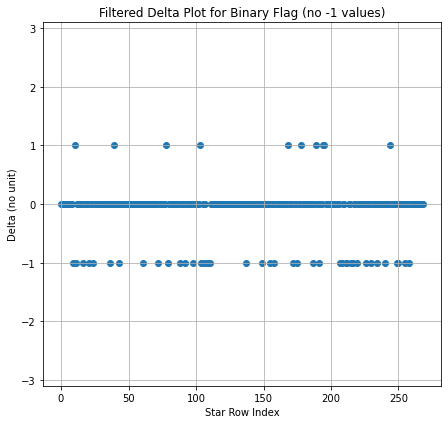

Number of rows after filtering out -1.0: 269
Number of items with a delta >= 1 (filtered data): 51
Same binary flag count (filtered data): 218
Number of rows unfiltered 958
Same binary flag count (unfiltered data): 542
Number of items originally unclassified that were classified: 103
Number of items originally classified that lost classification: 262
Number of items changed classification: 51


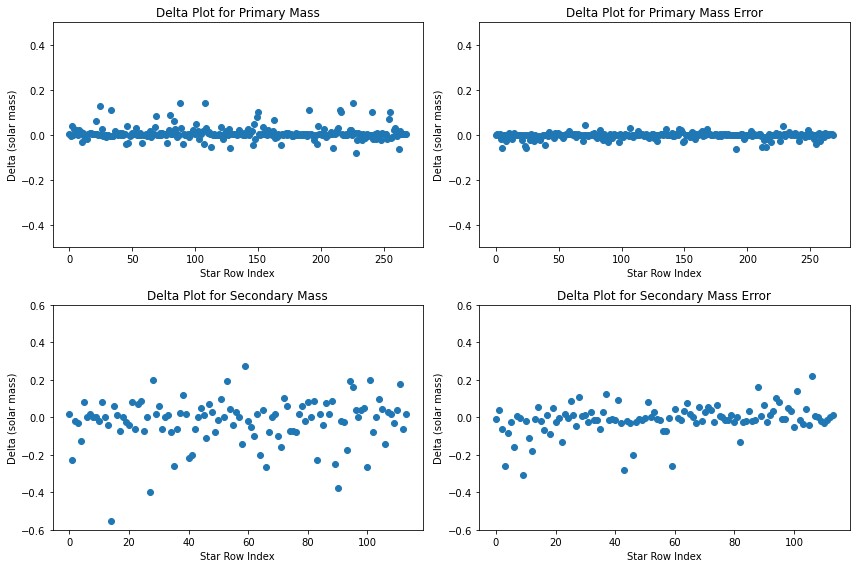

stddev of pmass: 0.03024182497890095
stddev of p_err: 0.013850547937163692
stddev of smass: 0.12312371320530674
stddev of s_err: 0.0787393592709195
Number of rows filtered: 269
Number of rows that are binaries : 114
PrimaryMass delta >= 0.5: 0
PrimaryMassError delta >= 0.5: 0
SecondaryMass delta >= 0.5: 14
SecondaryMassError delta >= 0.5: 6


In [5]:
def main():
    verbose = False
    orginal_results_df = read_original_results_csv("NGC2682_original_results.csv")
    if verbose: print(orginal_results_df)
    queried_results_df = read_queried_results_csv("ngc_ubvri_ugriz_jhkb_all_query.csv--result_df.csv")
    if verbose: print(queried_results_df)
    merged_df = merge_original_queried_results(orginal_results_df,queried_results_df)
    print("rows =", merged_df.shape[0] )
    same_binary_flag_data = count_same_binary_flag(merged_df)
    generate_delta_plot(same_binary_flag_data)



main()
